# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [1]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

26944


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [2]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [3]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'radial_position')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\radial_position\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\radial_position\figures.


# Plotting parameters

In [4]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [5]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


## cell type color-codes

In [6]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


In [7]:
# this is the plotting order noted based on the snRNA transcriptional acitivty if needed
sorted_cellplot_order_byRNA = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                  'L5/6 NP', 'Sst', 'Sncg', 'Pvalb', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET']

# Load data relevant information

## load and format codebook

[merged codebook](../resources/merged_codebook.csv) as in the repository (merged for all DNA-MERFISH libraries)

In [8]:
# Load codebook 
codebook_fname = os.path.join(input_folder,'merged_codebook.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df by chr and chr_order
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)
codebook_df.head()

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1:9627926-9637875,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1:9799472-9811359,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
# Format the chr loci name by 
# 1. changing loci name format
# 2. extract relevant information such as id, chr, chr_order, and library etc
from gene_to_loci import loci_pos_format
loci_name_list = list(map(loci_pos_format, codebook_df['name'].tolist()))
loci_name_arr = np.array(loci_name_list)

# convert to a new dataframe and set loci name as index
codebook_df = codebook_df[['name','id','chr','chr_order','library']]
codebook_df['loci_name'] = list(loci_name_arr[:,0])
codebook_df = codebook_df.set_index ('loci_name')

codebook_df.head()

,name,id,chr,chr_order,library
loci_name,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0.0,CTP11
chr1_6245958_6258969,1:6245958-6258969,2,1,1.0,CTP11
chr1_8740008_8759916,1:8740008-8759916,3,1,2.0,CTP11
chr1_9627926_9637875,1:9627926-9637875,1,1,3.0,CTP13
chr1_9799472_9811359,1:9799472-9811359,2,1,4.0,CTP13


# Load radial position summary

Data can be generated from the notebook:

[1_1_radial_position_convexhull_singlecell_dataframe](1_1_radial_position_convexhull_singlecell_dataframe.ipynb)

In [10]:
min_pts_th = 600
output_fname = os.path.join(output_analysis_folder, f'radial_pos_convexhull_median_summary_{min_pts_th}pts_bysubclass_v2.csv')

sorted_median_radial_pos_all = pd.read_csv(output_fname, index_col=0)
sorted_median_radial_pos_all.head()

,chr,chr_order,norm_radial_position,total_cell,subclass
loci_name,,,,,
chr1_3742742_3759944,1,0.0,0.860136,1022.0,L2/3 IT
chr1_6245958_6258969,1,1.0,0.855358,969.0,L2/3 IT
chr1_8740008_8759916,1,2.0,0.850017,628.0,L2/3 IT
chr1_9627926_9637875,1,3.0,0.839728,960.0,L2/3 IT
chr1_9799472_9811359,1,4.0,0.826204,900.0,L2/3 IT


## position across celltypes

0it [00:00, ?it/s]C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_26944\3747559067.py:33: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(grid[_class_ind])
19it [00:00, 28.21it/s]
meta NOT subset; don't know how to subset; dropped


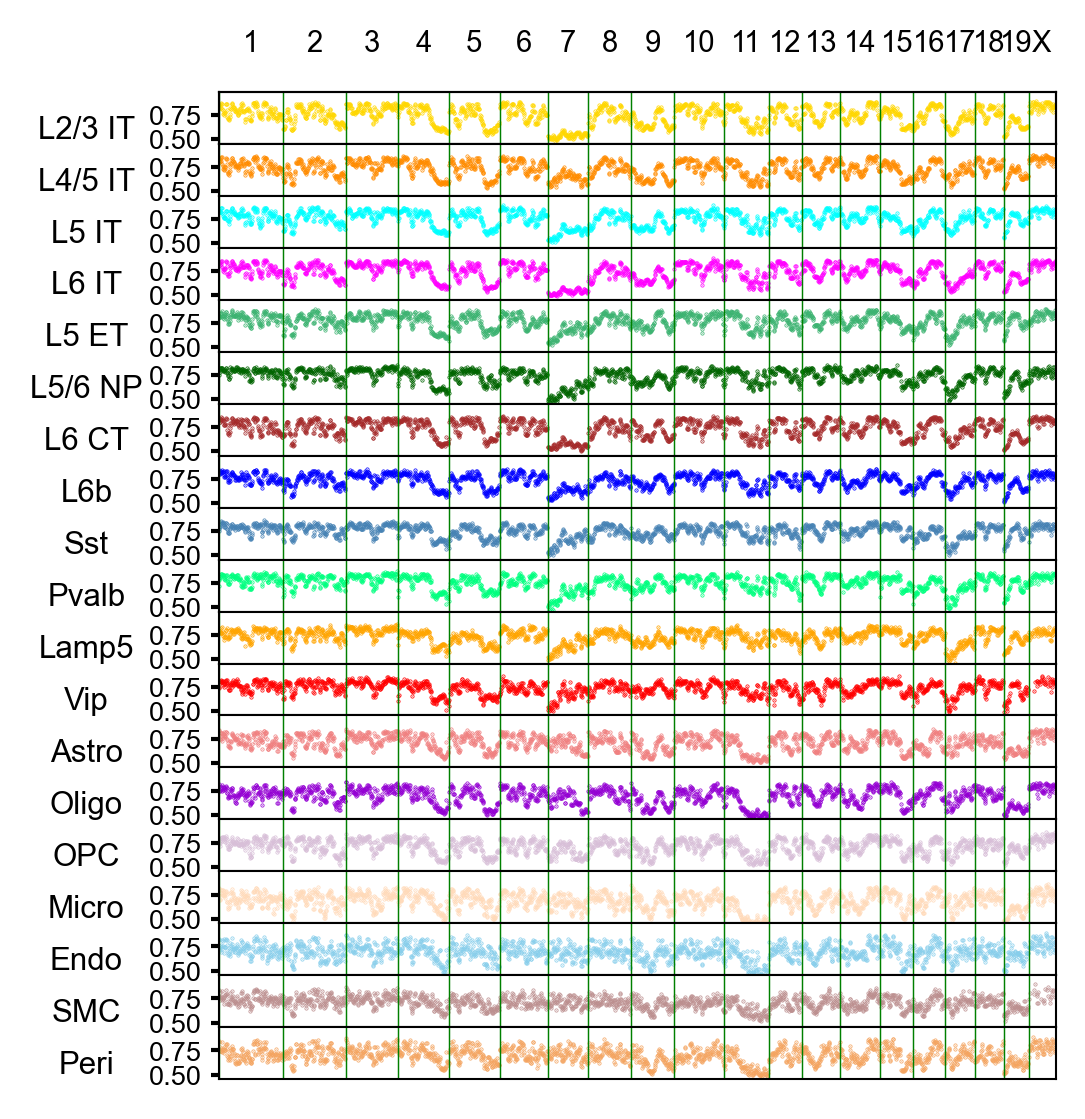

In [17]:
%matplotlib inline
#plt.style.use('default')
from ImageAnalysis3.figure_tools import _dpi,_single_col_width,_double_col_width,_single_row_height,_ref_bar_length, _ticklabel_size,_ticklabel_width,_font_size

# min num of cells to include for plot
min_cell_th = 50
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','SMC','Peri', 
                           #'other',
                          ]

fig, ax = plt.subplots(figsize=(_single_col_width*1.6, _single_col_width*len(selected_cell_labels)/10), dpi=300)
grid = plt.GridSpec(len(selected_cell_labels), 1,  hspace=0., wspace=0.)

import tqdm

for _class_ind, _class in tqdm.tqdm(enumerate(selected_cell_labels)):

    sorted_median_radial_pos = sorted_median_radial_pos_all[sorted_median_radial_pos_all['subclass']==_class]
    sorted_median_radial_pos.loc[sorted_median_radial_pos['total_cell']<min_cell_th,'norm_radial_position']=np.nan
    
    plot_chr_names = [str(i) for i in range(1,20)]
    plot_chr_names.append('X')
    plot_chr_edges = [len(sorted_median_radial_pos[sorted_median_radial_pos['chr']==chr_name]) for chr_name in plot_chr_names]

    x= np.arange(0, len(sorted_median_radial_pos))
    y= np.array(sorted_median_radial_pos['norm_radial_position'].tolist())
    
    plot_chr_edges=np.cumsum(plot_chr_edges)
    plot_chr_edges=np.insert(plot_chr_edges,0,0)
    
    ax = plt.subplot(grid[_class_ind])

    ax.scatter(x,y, alpha=0.9, s=0.15,marker ='.', color=celltype_palette[_class], rasterized=True)
    
    # add chr annotation as twiny dummy ax on top
    if _class_ind==0:
        ax2 = ax.twiny()
        ax2.set_xlim([0,plot_chr_edges[-1]])
        #ax2.set_xlim(ax.get_xlim())
        ax2_Labels = plot_chr_names
        ax2_tick_chr_edges = ((plot_chr_edges[1:]+plot_chr_edges[:-1])/2)
        ax2.set_xticks(ax2_tick_chr_edges,pad=5)
        ax2.set_xticklabels(ax2_Labels,fontdict={'fontsize':_font_size})
        ax2.tick_params(axis='x',          # changes apply to the x-axis
                         which='both',      # both major and minor ticks are affected
                          bottom=False,      # ticks along the bottom edge are off
                            top=False,         # ticks along the top edge are off
                            labelbottom=False,
                        labelsize=_font_size-0.5,
                       )
        ax2.set_ylabel("Chr", fontsize=_font_size, rotation=0,labelpad=5)
        ax2.grid(False)
        
        [i[1].set_linewidth(0.5) for i in ax2.spines.items()]
       
    ax.tick_params('y',labelsize=_font_size-1,pad=2, length =2) # change y tick label size
    #ax.set_xlabel("Imaged loci", fontsize=12, labelpad=7, )
    ax.set_ylabel(f"{_class}", fontsize=_font_size, rotation=0,labelpad=15, y=0)

    #ax.set_title(f"Radial positioning for loci in {_class}", fontsize=13, y=1)
    ax.tick_params('x', labelrotation=45,
            pad=1,labelbottom=False, size=0)

    ymin = 0.45
    ymax= 0.99
    ax.set_ylim([ymin,ymax])
    #ax.set_yticks([-12,12])
    #ax.set_xlim([0,3050])
    ax.set_xlim([0,plot_chr_edges[-1]])

    ax.vlines(plot_chr_edges, ymin,ymax, color='green', linewidth=0.35)
    ax.grid(False)
    [i[1].set_linewidth(0.5) for i in ax.spines.items()]
    

plt.savefig(os.path.join(output_figure_folder, f'radial_position_across_celltypes.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight')
plt.show()

## correlation summary

meta NOT subset; don't know how to subset; dropped


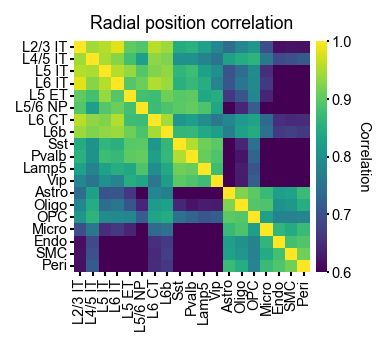

In [24]:
%matplotlib inline

from scipy import stats
from scipy.stats import linregress, pearsonr
from scipy.spatial.distance import cdist,pdist,squareform


# get all chromosome combined corr matrix
all_chr_combined_corr_mat = np.zeros((len(selected_cell_labels),len(selected_cell_labels)))

for _i, _class1 in enumerate(selected_cell_labels):
    sorted_median_radial_pos_cls1 = sorted_median_radial_pos_all[sorted_median_radial_pos_all['subclass']==_class1]
    sorted_median_radial_pos_cls1.loc[sorted_median_radial_pos_cls1['total_cell']<min_cell_th,'norm_radial_position']=np.nan
    
    for _j, _class2 in enumerate(selected_cell_labels):
        sorted_median_radial_pos_cls2 = sorted_median_radial_pos_all[sorted_median_radial_pos_all['subclass']==_class2]
        sorted_median_radial_pos_cls2.loc[sorted_median_radial_pos_cls2['total_cell']<min_cell_th,'norm_radial_position']=np.nan
        
        _radial_pos_1 = sorted_median_radial_pos_cls1['norm_radial_position'].tolist()
        _radial_pos_2 = sorted_median_radial_pos_cls2['norm_radial_position'].tolist()

        good_ind = (~np.isnan(_radial_pos_1)) & (~np.isnan(_radial_pos_2))
        _radial_pos_1_good = np.array(_radial_pos_1)[good_ind]
        _radial_pos_2_good = np.array(_radial_pos_2)[good_ind]

        # calculate correlation
        #spearr = stats.spearmanr()
        if len(_radial_pos_1_good)>0 and len(_radial_pos_2_good)>0:
            #lr = linregress((_radial_pos_1_good),
                    #(_radial_pos_2_good))
            #all_chr_combined_corr_mat[_i,_j]= lr.rvalue
            all_chr_combined_corr_mat[_i,_j] = pearsonr(_radial_pos_1_good, _radial_pos_2_good)[0]
        else:
            all_chr_combined_corr_mat[_i,_j]= np.nan

            
            
# plot correlation matrix
fig, ax = plt.subplots(figsize=(_page_width/2.25,_page_width/2.75),
                       dpi=150)

corr_matrix_df = pd.DataFrame(all_chr_combined_corr_mat, 
                             columns = selected_cell_labels, 
                             index = selected_cell_labels)

sns.heatmap(corr_matrix_df, annot=False,
            cmap='viridis',ax=ax,vmin=0.6,vmax=1,
            cbar_kws={'label':'Correlation', "pad": 0.02}
           )

ax.set_xticks(np.arange(0,len(selected_cell_labels))+0.5)
ax.set_yticks(np.arange(0,len(selected_cell_labels))+0.5)
TickLabels = selected_cell_labels
ax.set_xticklabels(TickLabels,rotation=90,fontdict={'fontsize':_font_size})
ax.set_yticklabels(TickLabels,rotation=0,fontdict={'fontsize':_font_size})

ax.tick_params('x', labelsize=_font_size-0.5, 
                #width=_ticklabel_width, 
               length=_ticklabel_size,
                labeltop=False,
                pad=1, )
ax.tick_params('y', labelsize=_font_size-0.5, 
                #width=_ticklabel_width, 
               length=_ticklabel_size,
                #labeltop=False,
                pad=1, )
ax.figure.axes[-1].tick_params(axis='y', length=1, pad=1, labelsize=_font_size-0.5,)
ax.figure.axes[-1].set_ylabel('Correlation', fontsize=_font_size-0.5, rotation=270, labelpad=9)

ax.set_title('Radial position correlation')
[i[1].set_linewidth(0.5) for i in ax.spines.items()]


plt.savefig(os.path.join(output_figure_folder, f'corr_radial_position_across_celltypes.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight')
        
#cb.ax.minorticks_off()
plt.show()  

